In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
dataset=pd.read_csv('auto-mpg.data',names=column_names,sep=" ",comment='\t',na_values="?",skipinitialspace=True)

In [3]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset.isnull().sum()
dataset['Horsepower']=dataset['Horsepower'].fillna(np.mean(dataset['Horsepower']))
origin=dataset.pop('Origin')
dataset['USA']=(origin==1)*1.0
dataset['Europe']=(origin==2)*1.0
dataset['Japan']=(origin==3)*1.0
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,318.0,104.073418,38.368477,46.0,75.25,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


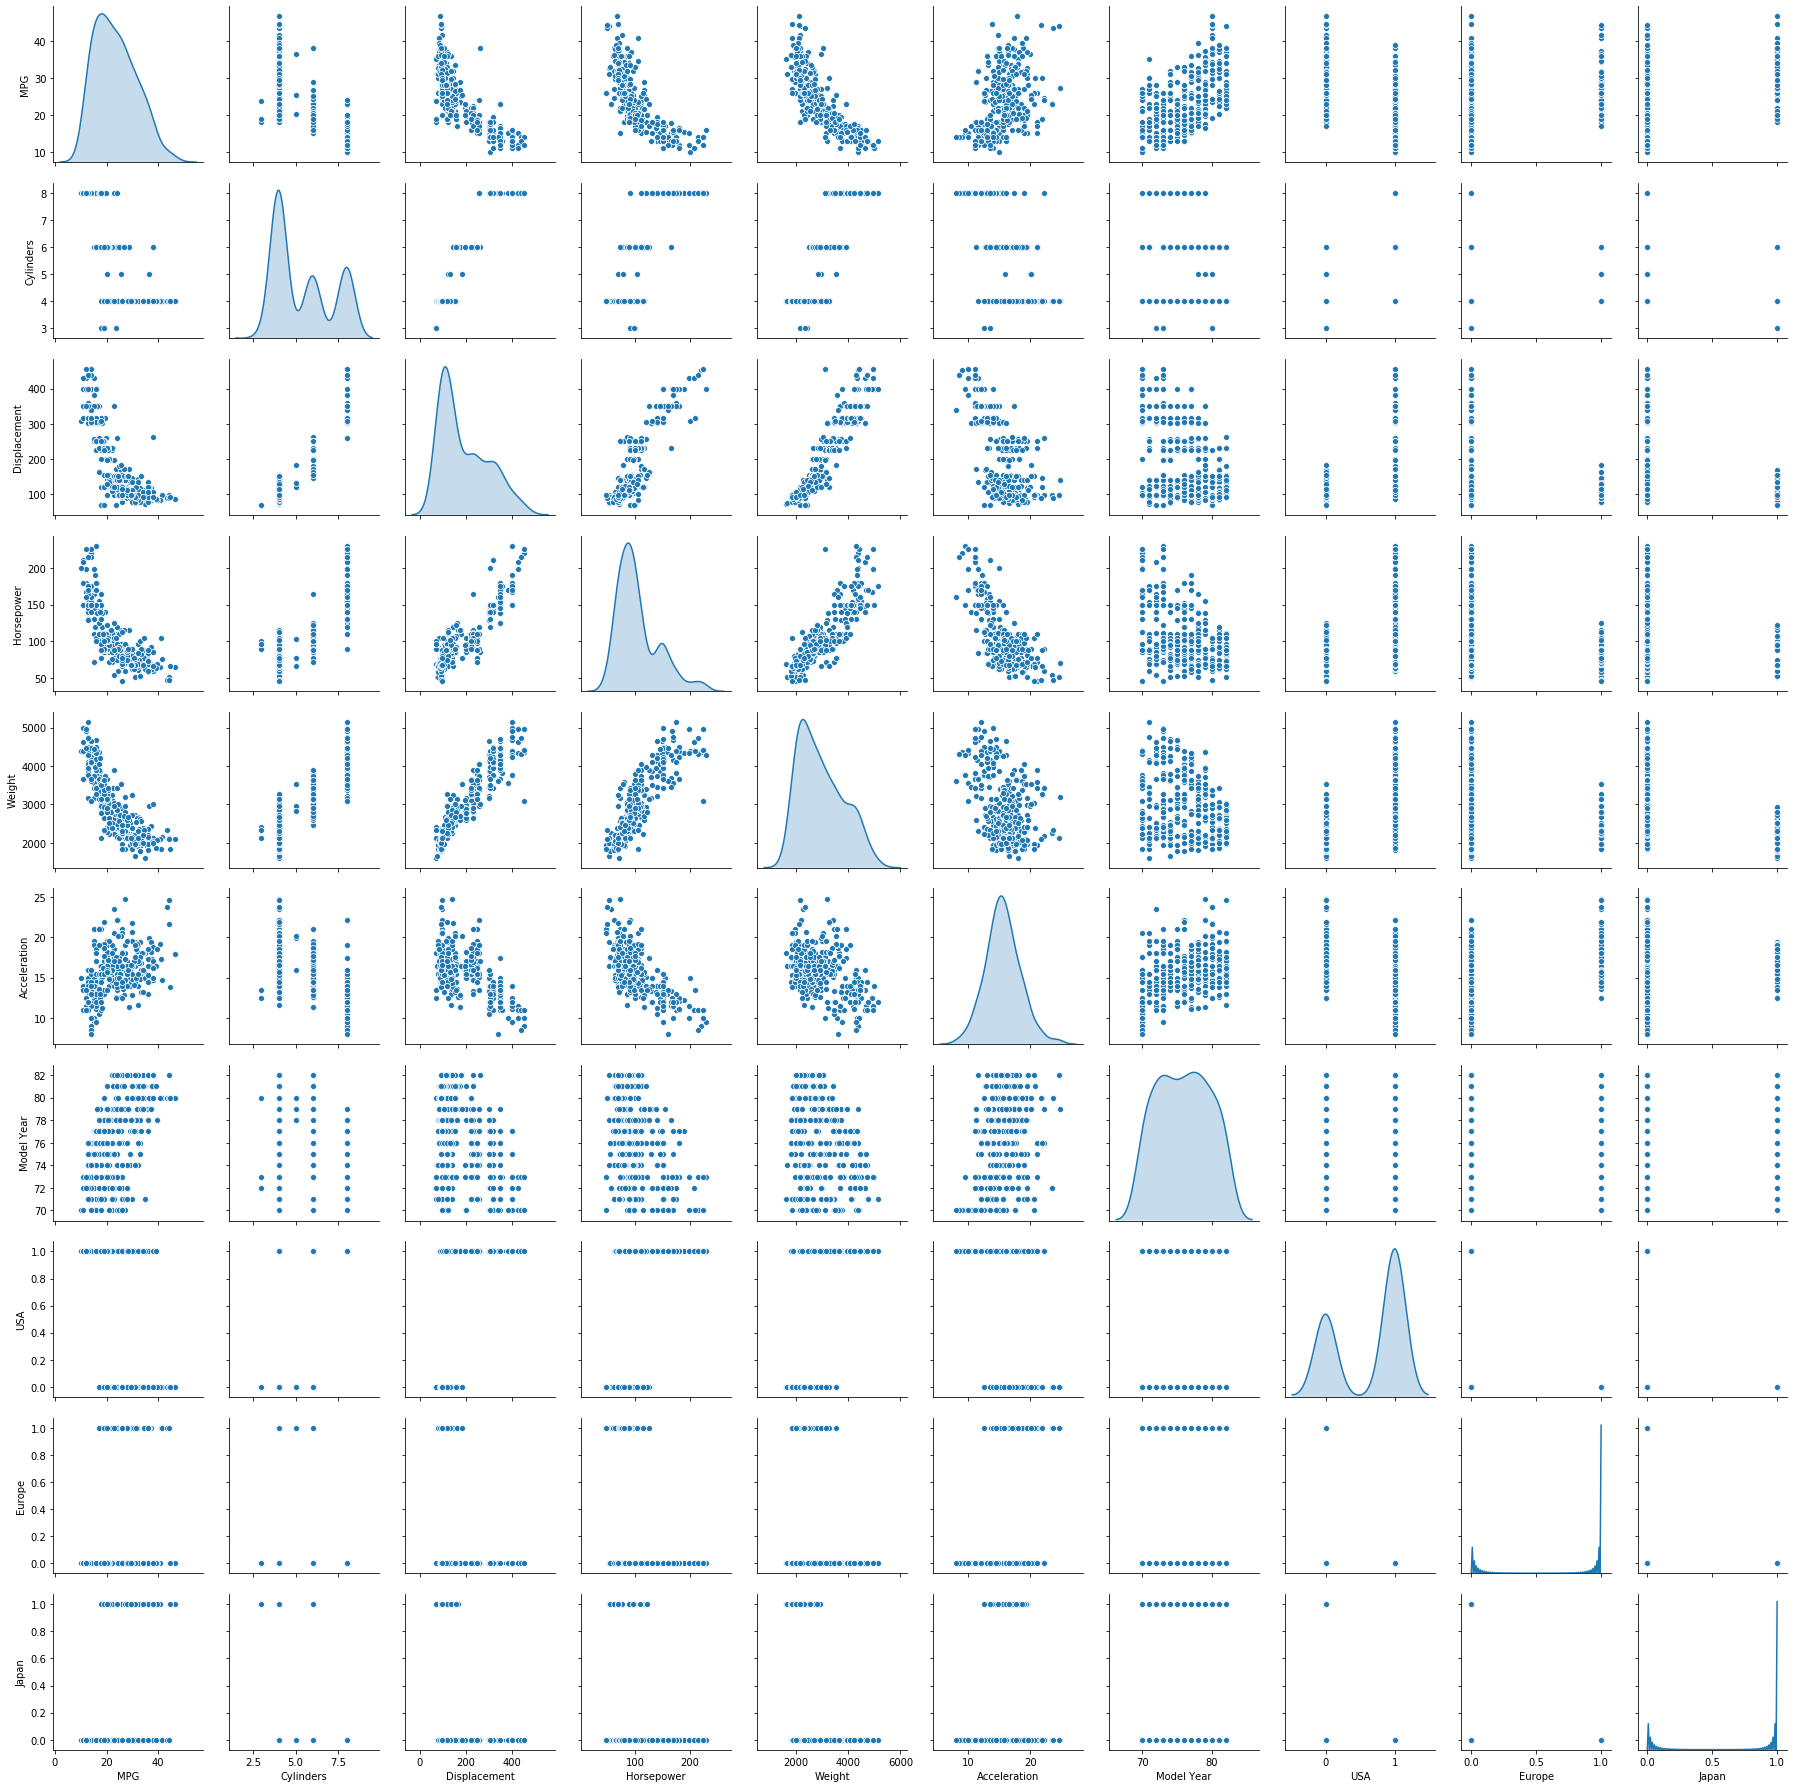

In [5]:
df_train=dataset.sample(frac=0.8,random_state=0)
df_test=dataset.drop(df_train.index)
sns.pairplot(df_train,diag_kind='kde')
train_stats=df_train.describe()
train_stats.pop("MPG")
train_stats=train_stats.transpose()
train_stats

In [6]:
train_label=df_train.pop("MPG")
test_label=df_test.pop("MPG")

In [7]:
def normalization(x):
    return (x - train_stats['mean'])/train_stats['std']
norm_df_train=normalization(df_train)
norm_df_test=normalization(df_test)

In [8]:
def build_model():
    model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[len(df_train.keys())]),
        tf.keras.layers.Dense(64,activation=tf.nn.relu),
        tf.keras.layers.Dense(32,activation=tf.nn.relu),
        tf.keras.layers.Dense(1),
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
        
    model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_absolute_error','mean_squared_error'])
        
    return model

In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
        
    if epoch % 100 == 0: print('')
    print('.', end='')

In [11]:
history=model.fit(norm_df_train,train_label,epochs=1000, callbacks=[PrintDot()], verbose=0,validation_split=0.2)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,3.029047,1.146503,3.029047,8.079370,1.878251,8.079370,995
996,3.105932,1.188232,3.105932,7.903481,1.853253,7.903481,996
997,3.086300,1.125479,3.086300,8.272045,1.936669,8.272045,997
998,3.113864,1.156270,3.113864,7.599663,1.789055,7.599663,998
999,2.934353,1.113754,2.934353,8.698192,1.979996,8.698192,999


In [13]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

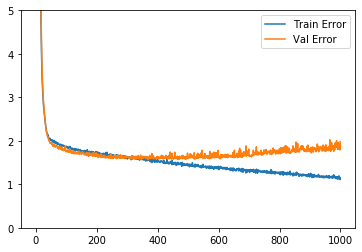

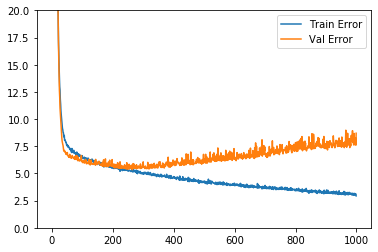

In [14]:
plot_history(history)

In [15]:
model=build_model()

In [16]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [17]:
history=model.fit(norm_df_train,train_label,callbacks=[early_stop,PrintDot()],verbose=0,validation_split=0.2,epochs=1000)


....................................................................................................
.............................

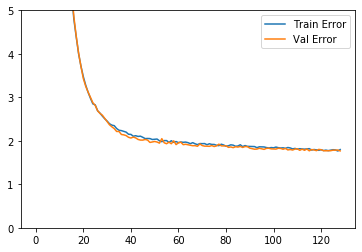

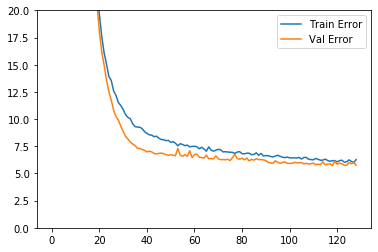

In [18]:
plot_history(history)

In [19]:
loss, mae, mse = model.evaluate(norm_df_test, test_label, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.91 MPG


In [20]:
test_predictions = model.predict(norm_df_test).flatten()

(0, 47.374653762876555)

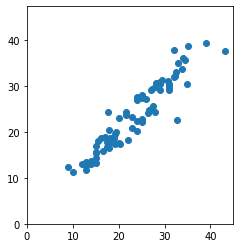

In [21]:
plt.scatter(test_label, test_predictions)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])